In [112]:
# Importation of packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from scipy.integrate import solve_bvp
from scipy import special

## Question 03

Let's Implement a modified version of Bvp_simple.py with a modified matrix
setup part by solving the following boundary value problem 
\begin{equation}  \begin{split}-u''(x)&=5x \\ u(-1)&=-0.5, u(1)=0.5 \end{split}\end{equation}

Our modified version of Bvp_simple.py with an explicit location of the storage of the indices A[i,j] is the following: 

cpu time 0.0006799697875976562
approximation error 1.608783673118717e-14


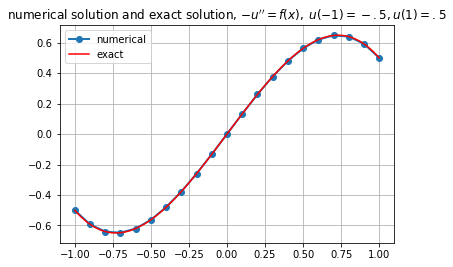

In [109]:
def Bvp(fcn, a, b, ua, ub, Nx):
    """ 
    Solution of 1D boundary value problem 
        -u" = fcn(x) for a < x < b
    with boundary conditions
        u(a) = ua,  u(b) = ub.
    on a uniform mesh
    """

    L = b-a                     # length of the domain
    dx = float(L)/float(Nx)     # length of the grid cell
    x = np.linspace(a, b, Nx+1) # the grid
    u = np.zeros(Nx+1)          # solution

    # the matrix setup
    A=np.zeros((Nx+1,Nx+1))
    for i in range(Nx+1):
        for j in range(Nx+1):
            if i == j:
                A[i,j]=2/dx**2
            if j == i-1:
                A[i,j]=-1/dx**2
            if i == j-1:
                A[i,j]=-1/dx**2
    A[0,0],A[0,1]=1,0 # Left boundary condition 
    A[-1,-1], A[-1,-2]=1,0  # right boundary condition

    # evaluate right hand side
    rhs = np.zeros(Nx+1)        # right hand side
    for j in range(1,Nx):
        rhs[j] = fcn(x[j])
    rhs[0], rhs[-1] = ua, ub

    # solve the linear system
    u[:] = solve(A, rhs);
    
    # return grid and numerical solution
    return u, x

if __name__ == '__main__':
    Nx =20 # Nx = number of grid cells, 
            # Nx+1 = number of grid points
    a = -1. # a = left end of the domain
    b = +1. # b = right end of the domain
    ua =-.5 # boundary value left side
    ub = .5 # boundary value right side 

    def fcn(x):
        return 5*x

    def exact(x):
        return x*(-5*x**2 + 8)/6

    import time
    t0 = time.time()
    u,x = Bvp(fcn, a, b, ua, ub, Nx)
    t1 = time.time()
    print('cpu time',t1-t0)

    # compute the error norm
    from scipy.linalg import norm
    print('approximation error', abs(norm(u-exact(x))))

    xx = np.linspace(a,b)
    sol = exact(xx)
 
    # generate a plot of the solution
    import matplotlib.pyplot as plt
    plt.plot(x,u,marker= 'o', linewidth=2.)
    plt.plot(xx,sol,'r-')
    plt.title('numerical solution and exact solution, $-u^{\prime\prime} = f(x),\; u(-1)=-.5, u(1)=.5$')
    plt.grid()
    plt.legend(['numerical', 'exact'])
    plt.show()

Let's see if the original code produces the same results. The following code is the original Bvp_simple.py

cpu time 0.0006308555603027344
approximation error 1.608783673118717e-14


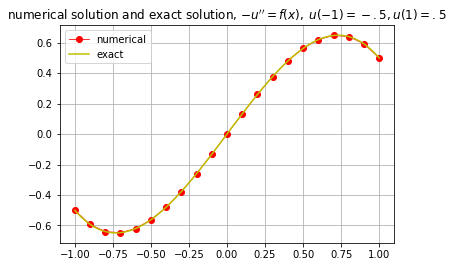

In [80]:
def Bvp(fcn, a, b, ua, ub, Nx):
    """ 
    Solution of 1D boundary value problem 
        -u" = fcn(x) for a < x < b
    with boundary conditions
        u(a) = ua,  u(b) = ub.
    on a uniform mesh
    """

    L = b-a                     # length of the domain
    dx = float(L)/float(Nx)     # length of the grid cell
    x = np.linspace(a, b, Nx+1) # the grid
    u = np.zeros(Nx+1)          # solution

    # the matrix setup
    dia = 2.*np.ones(Nx+1) / dx**2
    off = np.ones(Nx) / dx**2
    A = np.diag(dia) - np.diag(off,-1) - np.diag(off,1)  
    A[0,0], A[0,1] = 1., 0.     # left boundary condition
    A[-1,-1], A[-1,-2] = 1., 0. # right boundary condition

    # evaluate right hand side
    rhs = np.zeros(Nx+1)        # right hand side
    for j in range(1,Nx):
        rhs[j] = fcn(x[j])
    rhs[0], rhs[-1] = ua, ub

    # solve the linear system
    u[:] = solve(A, rhs);
    
    # return grid and numerical solution
    return u, x

if __name__ == '__main__':
    Nx = 20 # Nx = number of grid cells, 
            # Nx+1 = number of grid points
    a = -1. # a = left end of the domain
    b = +1. # b = right end of the domain
    ua =-.5 # boundary value left side
    ub = .5 # boundary value right side 

    def fcn(x):
        return 5*x

    def exact(x):
        return x*(-5*x**2 + 8)/6

    import time
    t0 = time.time()
    u,x = Bvp(fcn, a, b, ua, ub, Nx)
    t1 = time.time()
    print('cpu time',t1-t0)

    # compute the error norm
    from scipy.linalg import norm
    print('approximation error', abs(norm(u-exact(x))))

    xx = np.linspace(a,b)
    sol = exact(xx)
 
    # generate a plot of the solution
    import matplotlib.pyplot as plt
    plt.plot(x,u,'ro-', linewidth=.8)
    plt.plot(xx,sol,'y-')
    plt.title('numerical solution and exact solution, $-u^{\prime\prime} = f(x),\; u(-1)=-.5, u(1)=.5$')
    plt.grid()
    plt.legend(['numerical', 'exact'])
    plt.show()

**Comments**:
* We notice that we obtain the same result than the one with our modified code.
* We also notice that the solution with our method takes es time than the one using sparse np.diag and sparse matrix techniques. 

## Question 04

Let's implement the program to solve the following BVP. \begin{equation}  \begin{split}-u''(x)&=6x \\ u(-1)&=2., u(1)=0. \end{split}\end{equation}
To do so, we make use of the function Bvp contained in the file Bvp_simple.py. The exact  solution that we obtain analytically is $u(x)=-x^3+1$.

cpu time 0.0011029243469238281
approximation error 1.0990647210786425e-15


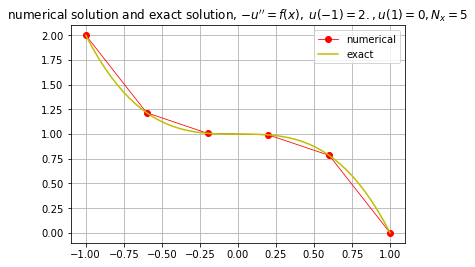

In [110]:
def Bvp(fcn, a, b, ua, ub, Nx):
    """ 
    Solution of 1D boundary value problem 
        -u" = fcn(x) for a < x < b
    with boundary conditions
        u(a) = ua,  u(b) = ub.
    on a uniform mesh
    """

    L = b-a                     # length of the domain
    dx = float(L)/float(Nx)     # length of the grid cell
    x = np.linspace(a, b, Nx+1) # the grid
    u = np.zeros(Nx+1)          # solution

    # the matrix setup
    dia = 2.*np.ones(Nx+1) / dx**2
    off = np.ones(Nx) / dx**2
    A = np.diag(dia) - np.diag(off,-1) - np.diag(off,1)  
    A[0,0], A[0,1] = 1., 0.     # left boundary condition
    A[-1,-1], A[-1,-2] = 1., 0. # right boundary condition

    # evaluate right hand side
    rhs = np.zeros(Nx+1)        # right hand side
    for j in range(1,Nx):
        rhs[j] = fcn(x[j])
    rhs[0], rhs[-1] = ua, ub

    # solve the linear system
    u[:] = solve(A, rhs);
    
    # return grid and numerical solution
    return u, x

if __name__ == '__main__':
    Nx = 5 # Nx = number of grid cells, 
            # Nx+1 = number of grid points
    a = -1. # a = left end of the domain
    b = +1. # b = right end of the domain
    ua = 2. # boundary value left side
    ub = 0. # boundary value right side 

    def fcn(x):
        return 6*x

    def exact(x):
        return -x**3+1

    import time
    t0 = time.time()
    u,x = Bvp(fcn, a, b, ua, ub, Nx)
    t1 = time.time()
    print('cpu time',t1-t0)

    # compute the error norm
    from scipy.linalg import norm
    print('approximation error', abs(norm(u-exact(x))))

    xx = np.linspace(a,b)
    sol = exact(xx)

    # generate a plot of the solution
    import matplotlib.pyplot as plt
    plt.plot(x,u,'ro-', linewidth=.8)
    plt.plot(xx,sol,'y-')
    plt.title('numerical solution and exact solution, $-u^{\prime\prime} = f(x),\; u(-1)=2., u(1)=0, N_x=5$')
    plt.grid()
    plt.legend(['numerical', 'exact'])
    plt.show()

Let's increase the value of Nx to 25. 

cpu time 0.0023005008697509766
approximation error 2.699840068226333e-14


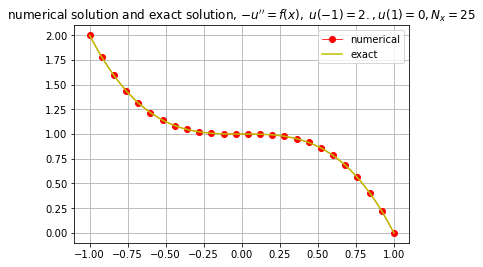

In [103]:
if __name__ == '__main__':
    Nx = 25 # Nx = number of grid cells, 
            # Nx+1 = number of grid points
    a = -1. # a = left end of the domain
    b = +1. # b = right end of the domain
    ua = 2. # boundary value left side
    ub = 0. # boundary value right side 

    def fcn(x):
        return 6*x

    def exact(x):
        return -x**3+1

    import time
    t0 = time.time()
    u,x = Bvp(fcn, a, b, ua, ub, Nx)
    t1 = time.time()
    print('cpu time',t1-t0)

    # compute the error norm
    from scipy.linalg import norm
    print('approximation error', abs(norm(u-exact(x))))

    xx = np.linspace(a,b)
    sol = exact(xx)

    # generate a plot of the solution
    import matplotlib.pyplot as plt
    plt.plot(x,u,'ro-', linewidth=.8)
    plt.plot(xx,sol,'y-')
    plt.title('numerical solution and exact solution, $-u^{\prime\prime} = f(x),\; u(-1)=2., u(1)=0, N_x=25$')
    plt.grid()
    plt.legend(['numerical', 'exact'])
    plt.show()

**Comments:** We can see that with a larger value of Nx (25), the numerical and the exact solutions fit very well together. They are almost equal.  

## Question 05

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          3.35e-04       2.00e-15         1000             0       
Solved in 1 iterations, number of nodes 1000. 
Maximum relative residual: 3.35e-04 
Maximum boundary residual: 2.00e-15


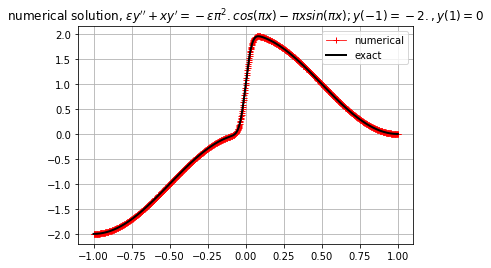

In [101]:
######  Define a function which calculates the derivative

def func(x, z):
    t = np.pi * x
    return np.vstack((
        z[1], -(x * z[1] + eps * np.pi**2 * np.cos(t) + t * np.sin(t)) / eps))


### Implement evaluation of the boundary condition residuals:

def func_bc(za, zb):
    return np.array([za[0] + 2, zb[0]])


x_range = np.linspace(-1, 1, 1000)
y_range = np.zeros((2, x_range.shape[0]))

resol = solve_bvp(func, func_bc, x_range, y_range, verbose=2)

def y_exact(xxx):
    eps = 1e-3
    k= np.sqrt(2*eps)
    return np.cos(np.pi*xxx) +special.erf(xxx/k)/special.erf(1/k)

solution = y_exact(x_range)

y_sol= resol.sol(x_range)

# generating a plot of the solution

plt.plot(x_range, y_sol[0],color='red', marker='+', linewidth=.8)
plt.plot(x_range,solution,'y-',color="black", lw=2)
plt.title('numerical solution, $\epsilon y^{\prime\prime}+ xy^{\prime} = -\epsilon \pi^2.cos(\pi x) -  \pi x sin(\pi x); y(-1)=-2., y(1)=0.$')
plt.grid()
plt.legend(['numerical', 'exact'])
plt.show()

**Comments:** We notice that with a large value of Nx, we notice that the two solutions are almost. 